### 35 - Seaborn Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
df = pd.read_csv('application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [12]:
#Task 1: Recreate a scatter plot shown 
#show whos employed in this dataframe
employed = df[df['DAYS_EMPLOYED'] < 0]
employed['DAYS_EMPLOYED'] = employed['DAYS_EMPLOYED']*-1
employed['DAYS_BIRTH'] = employed['DAYS_BIRTH']*-1

C:\Users\Armand S\AppData\Local\Temp\ipykernel_5508\870130691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_EMPLOYED'] = employed['DAYS_EMPLOYED']*-1
C:\Users\Armand S\AppData\Local\Temp\ipykernel_5508\870130691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_BIRTH'] = employed['DAYS_BIRTH']*-1


In [13]:
employed[['DAYS_BIRTH', 'DAYS_EMPLOYED']]

,DAYS_BIRTH,DAYS_EMPLOYED
0,12005,4542
1,12005,4542
2,21474,1134
3,19110,3051
4,19110,3051
...,...,...
438547,10966,2704
438548,12569,2095
438553,15939,3007
438554,8169,372


<Axes: xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

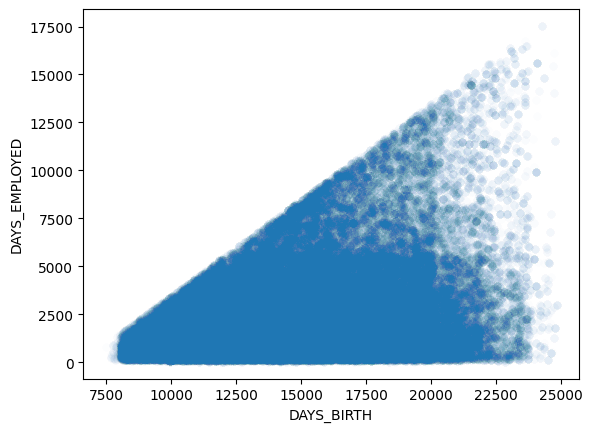

In [16]:
#Plot it on an x and y axis
sns.scatterplot(data=employed, y='DAYS_EMPLOYED', x='DAYS_BIRTH', alpha=0.01, linewidth=0)

In [22]:
#Task 2: Recreate a scatter plot shown and create a new YEARS column
df['YEARS'] = -1*df['DAYS_BIRTH'] / 365
df[['YEARS']]

,YEARS
0,32.890411
1,32.890411
2,58.832877
3,52.356164
4,52.356164
...,...
438552,62.238356
438553,43.668493
438554,22.380822
438555,59.378082


<Axes: xlabel='YEARS', ylabel='Count'>

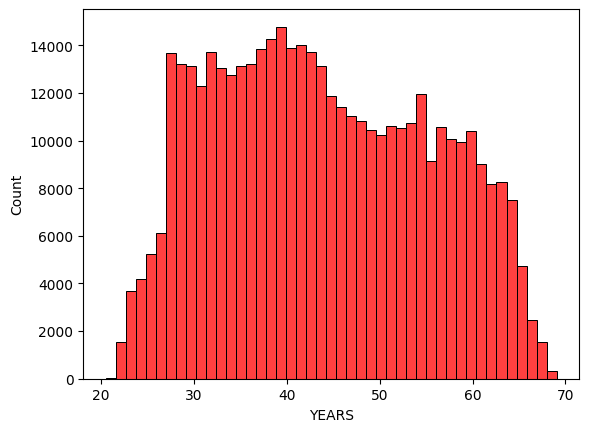

In [24]:
#Plot it
sns.histplot(data=df, x='YEARS', bins=45, color='red')

In [31]:
#Task 3, Recreate the Categorical Plot Shown Below
#show info only for bottom half of income earners in the dataset
#use nsmallest function for bottom part
bottom_half_income = df.nsmallest(n=219278, columns='AMT_INCOME_TOTAL')

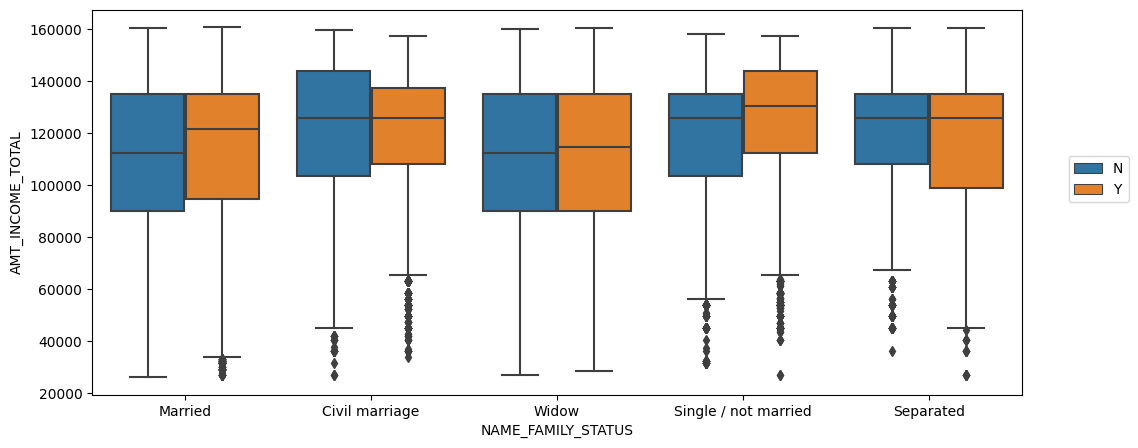

In [36]:
plt.figure(figsize=(12,5), dpi=100)
sns.boxplot(data=bottom_half_income, y='AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS', hue='FLAG_OWN_REALTY')\

plt.legend(loc =(1.05, 0.5))

<Axes: >

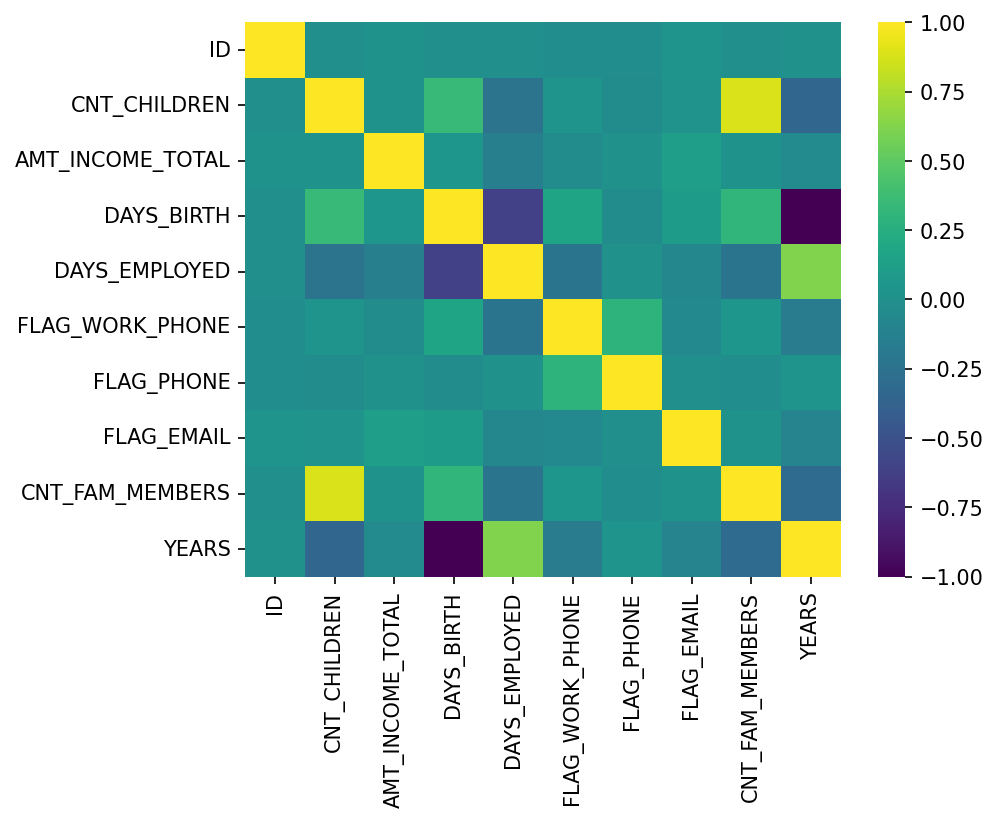

In [41]:
#task 4: Recreate the heatmap shown below
#this heatmap shows the correlation between the columns in the dataframe
plt.figure(dpi=150)
sns.heatmap(df.drop('FLAG_MOBIL', axis=1).select_dtypes(include=['number']).corr(), cmap='viridis')